In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from math import log10
from scipy.odr import ODR, Model, Data, RealData
import scipy.linalg as linalg

In [2]:
# Importing Cepheids' data set

cepheids = pd.read_csv('data1-Cepheids.csv')
print(cepheids.to_string())

        m     M  P (day)  std_M
0   21.54 -2.79    13.14   0.12
1   20.45 -3.88    25.40   0.17
2   21.25 -3.08    15.62   0.13
3   20.35 -3.98    26.98   0.18
4   22.37 -1.96     7.97   0.10
5   21.35 -2.98    14.78   0.13
6   22.09 -2.24     9.41   0.11
7   20.36 -3.97    26.79   0.18
8   20.98 -3.35    18.39   0.14
9   22.17 -2.16     8.96   0.11
10  20.17 -4.16    30.08   0.19
11  22.30 -2.03     8.27   0.11
12  20.34 -3.99    27.14   0.18
13  20.33 -4.00    27.32   0.18
14  21.18 -3.15    16.29   0.14
15  22.54 -1.79     7.17   0.16


In [3]:
# Fitting a Linear equation to (Log_P, M) including errors

def cepheids_fit(x, a, b):
    return a*np.log10(x)+b
P = np.array(cepheids['P (day)'])
P_sorted = np.sort(P)
log_P = np.log10(P)
log_P_sorted = np.log10(P_sorted)
M = np.array(cepheids['M'])
parameters, covariance = curve_fit(cepheids_fit, P, M, sigma=1/(cepheids['std_M'])**2)
print(parameters)
errors = np.sqrt(linalg.eigvals(covariance))
print(errors)


[-3.80495297  1.46466104]
[0.00028666+0.j 0.00414345+0.j]


Text(0.5, 1.0, 'The Log(P)-M relation for cepheids')

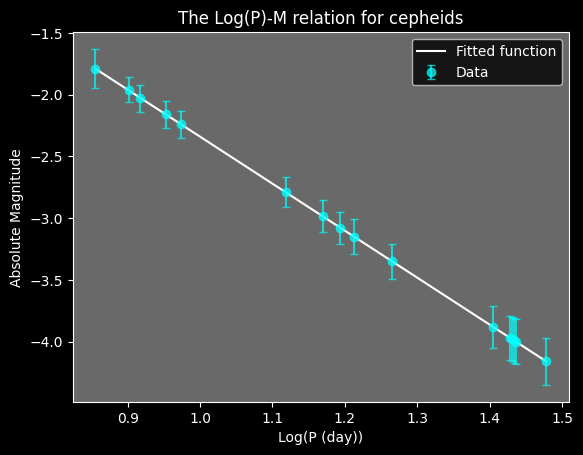

In [4]:
# Plotting our fit and data

ax = plt.axes()
ax.set_facecolor('dimgrey')
plt.plot(log_P_sorted, cepheids_fit(P_sorted, parameters[0], parameters[1]), label='Fitted function', color='white')
plt.errorbar(log_P, M, yerr=cepheids['std_M'], label='Data', color='cyan', alpha=.7, fmt='o', capsize=3)
plt.legend()
plt.xlabel('Log(P (day))')
plt.ylabel('Absolute Magnitude')
plt.title('The Log(P)-M relation for cepheids')

In [5]:
# Importing Hubble's data

hubble = pd.read_csv('data2-Hubble.csv')
print(hubble.to_string())

      m  std_m  P (day)         M    d (Mpc)     std_d  V (km/s)  std_V
0  25.2    0.2     39.5 -4.610649   9.164942  0.844122       547      6
1  24.8    0.2     38.7 -4.576828   7.505257  0.691260       468     12
2  25.6    0.1     35.8 -4.448079  10.223880  0.470827       625      4
3  24.9    0.1     41.7 -4.700238   8.318549  0.383083       492     13
4  25.5    0.1     30.2 -4.166906   8.577906  0.395027       510     18
5  24.5    0.2     39.2 -4.598047   6.600994  0.607974       385     14
6  24.1    0.1     42.9 -4.747132   5.880666  0.270815       343     13
7  25.1    0.2     41.4 -4.688303   9.071115  0.835481       557      3
8  25.1    0.2     32.5 -4.288228   7.544763  0.694898       454      6
9  24.8    0.1     42.1 -4.716018   8.002092  0.368510       482      3


In [6]:
# Fitting a linear equation to our data including only y-data errors

def hubble_fit(x, H):
    return H*x
d = np.array(hubble['d (Mpc)'])
d_sorted = np.sort(d)
V = np.array(hubble['V (km/s)'])
H, H_covariance = curve_fit(hubble_fit, d, V, sigma=hubble['std_V'])
H0 = H[0]
print(H0)
H0_error = np.sqrt(H_covariance)
print(H0_error)

60.75152495895944
[[0.24230641]]


(1, 10)


Text(0.5, 1.0, "Hubble's Equation with considering y-data errors")

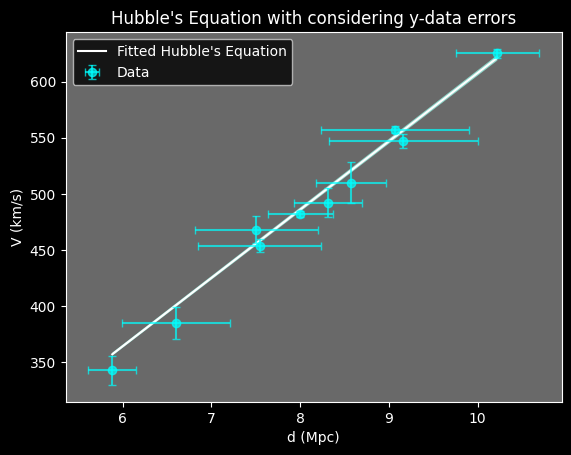

In [7]:
# Plotting our fit and data
print(hubble_fit(d_sorted, H[0]+H0_error).shape)
ax = plt.axes()
ax.set_facecolor('dimgrey')
# Plotting fit
plt.plot(d_sorted, hubble_fit(d_sorted, H[0]), label="Fitted Hubble's Equation", color='white')
# Plotting data
plt.errorbar(d, V, xerr=hubble['std_d'], yerr=hubble['std_V'], label='Data', color='cyan', alpha=.7, fmt='o', capsize=3)
# Plotting fit's error area
plt.fill_between(d_sorted, hubble_fit(d_sorted, (H[0]-H0_error)[0]), hubble_fit(d_sorted, (H[0]+H0_error)[0]))
plt.legend()
plt.xlabel('d (Mpc)')
plt.ylabel('V (km/s)')
plt.title("Hubble's Equation with considering y-data errors")

[60.75152499]
[[0.18844558]]


Text(0.5, 1.0, "Hubble's Equation with considering x-data and y-data errors")

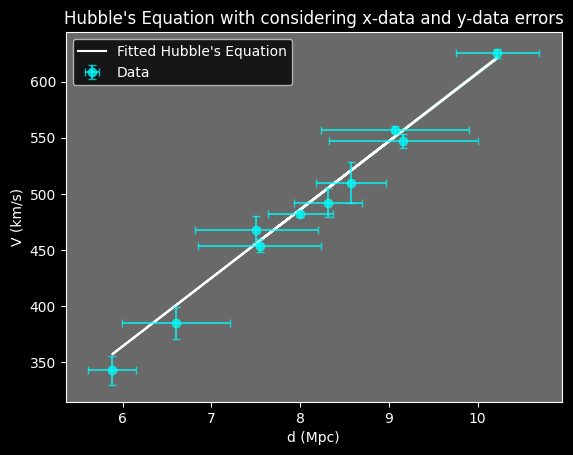

In [8]:
# Fitting a linear equation to our data including x-data and y-data errors (Optional)

data = RealData(hubble['d (Mpc)'], hubble['V (km/s)'], hubble['std_d'], hubble['std_V'])
model = Model(hubble_fit)
odr = ODR(data, model, [60])
odr.set_job(fit_type=2)
output = odr.run()
print(output.beta)
H0_error_odr = np.sqrt(output.cov_beta)
print(H0_error_odr)

ax = plt.axes()
ax.set_facecolor('dimgrey')
# Plotting fit
plt.plot(hubble['d (Mpc)'], hubble_fit(hubble['d (Mpc)'], output.beta), color='white', label="Fitted Hubble's Equation")
# Plotting data
plt.errorbar(d, V, xerr=hubble['std_d'], yerr=hubble['std_V'], label='Data', color='cyan', alpha=.7, fmt='o', capsize=3)
# Plotting fit's error area
plt.fill_between(d_sorted, hubble_fit(d_sorted, (output.beta-H0_error_odr)[0]), hubble_fit(d_sorted, (output.beta+H0_error_odr)[0]))
plt.legend()
plt.xlabel('d (Mpc)')
plt.ylabel('V (km/s)')
plt.title("Hubble's Equation with considering x-data and y-data errors")